In [113]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [114]:
# Cargando datos
df = pd.read_csv('./db_sf6_sudamerica_mr.csv')
df.head(5)

,jugador,cfn_id,personaje,pais,mr
0,Renameless,3311873515,Chun-Li,Brasil,2022
1,JUNINHO-RAS,2622990354,Luke,Brasil,2003
2,Salvatore_pc,1154684827,Cammy,Venezuela,2002
3,Killerwal,3381453962,Ken,Chile,2002
4,Dookie-PC,3277074647,JP,Argentina,2000


In [115]:
df

,jugador,cfn_id,personaje,pais,mr
0,Renameless,3311873515,Chun-Li,Brasil,2022
1,JUNINHO-RAS,2622990354,Luke,Brasil,2003
2,Salvatore_pc,1154684827,Cammy,Venezuela,2002
3,Killerwal,3381453962,Ken,Chile,2002
4,Dookie-PC,3277074647,JP,Argentina,2000
...,...,...,...,...,...
4495,Zé Vernézio,2800693235,Zangief,Brasil,1208
4496,JOY-ESTRAGADO !,3878587109,Ken,Brasil,1208
4497,ISMAEL_BHZ,1154665303,Guile,Brasil,1206
4498,JhonEdison_PC,3232995158,Manon,Colombia,1203


In [116]:
# Binning del MR
bin_edges = [900,1000,1100,1200,1300,1400,1500,1600,1800,1900,2000,2100,2200]
df['bin'] = pd.cut(df['mr'],bins=bin_edges)
df.head()

,jugador,cfn_id,personaje,pais,mr,bin
0,Renameless,3311873515,Chun-Li,Brasil,2022,"(2000, 2100]"
1,JUNINHO-RAS,2622990354,Luke,Brasil,2003,"(2000, 2100]"
2,Salvatore_pc,1154684827,Cammy,Venezuela,2002,"(2000, 2100]"
3,Killerwal,3381453962,Ken,Chile,2002,"(2000, 2100]"
4,Dookie-PC,3277074647,JP,Argentina,2000,"(1900, 2000]"


In [117]:
# Promedio MR por país

avg_mr_country = df.groupby('pais')['mr'].mean().astype('int')
avg_mr_country_final = avg_mr_country.to_frame()
avg_mr_country_final.reset_index(inplace=True)
avg_mr_country_final

,pais,mr
0,Argentina,1482
1,Bolivia,1490
2,Brasil,1492
3,Chile,1489
4,Colombia,1455
5,Ecuador,1475
6,Guyana,1482
7,Paraguay,1482
8,Perú,1489
9,Surinam,1427


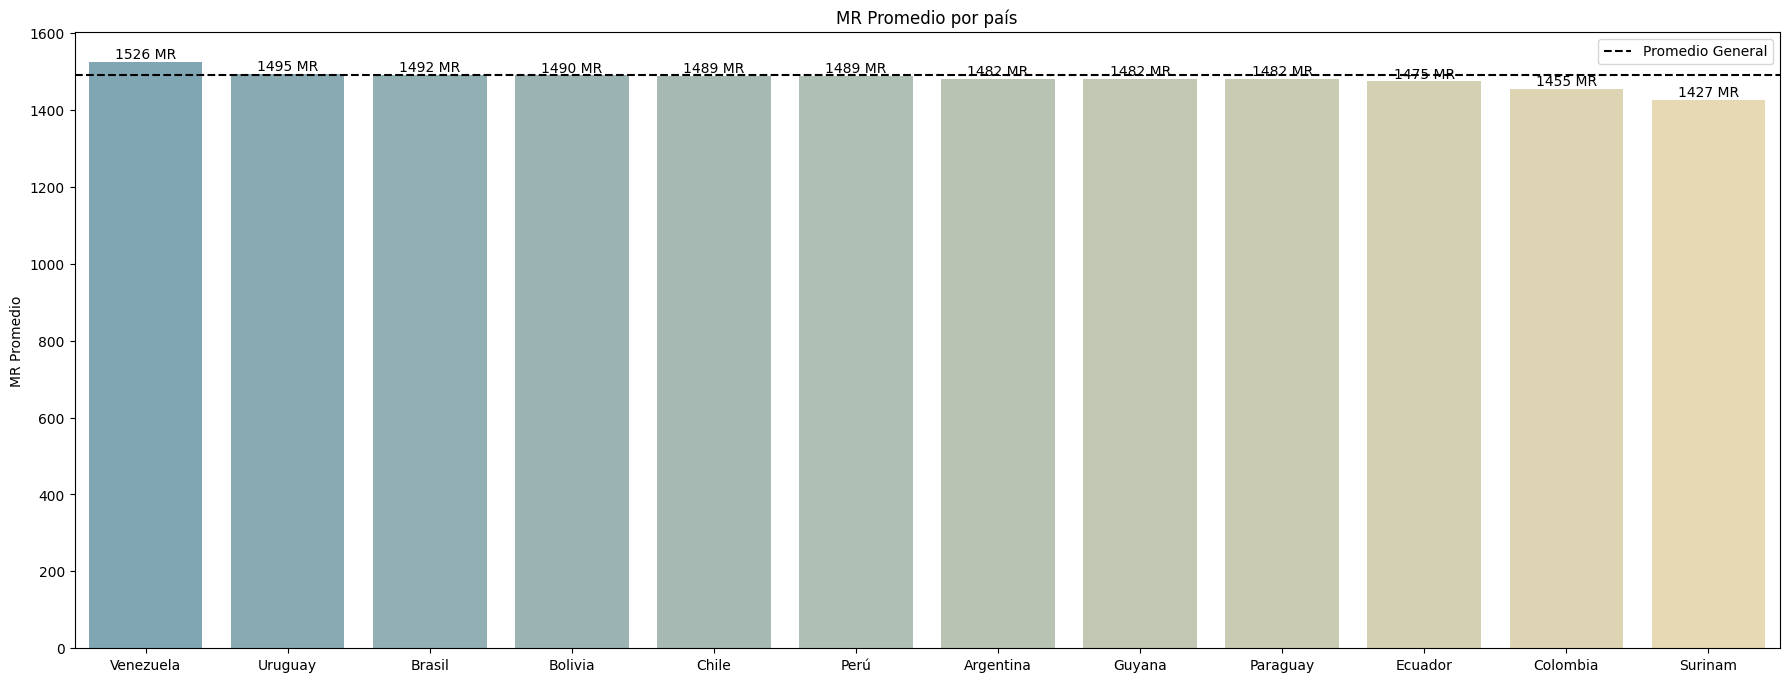

In [118]:
# Grafico

# Plot y config
plt.figure(figsize=(22, 8))
sns.barplot(data = avg_mr_country_final.sort_values(by='mr',ascending=False),x='pais',y='mr',palette="blend:#7AB,#EDA")
plt.title("MR Promedio por país")
ax = plt.gca()
ax.set_xlabel("")
ax.set_ylabel('MR Promedio')

# Agregando data marks
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} MR', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
# Agregando el promedio
mr_avg = df['mr'].mean()
plt.axhline(y = mr_avg,color='black',linestyle='--',label='Promedio General')
plt.legend()

# Show
plt.show()

In [119]:
# Promedio MR por personaje

avg_mr_pj = df.groupby('personaje')['mr'].mean().astype('int')
avg_mr_pj_final = avg_mr_pj.to_frame()
avg_mr_pj_final.reset_index(inplace=True)
avg_mr_pj_final.sort_values(by='mr',ascending=False)

,personaje,mr
0,A.K.I.,1561
6,Dhalsim,1512
9,JP,1511
1,Aleatorio,1508
4,Chun-Li,1507
18,Rashid,1502
15,Luke,1498
5,Dee Jay,1495
3,Cammy,1495
2,Blanka,1494


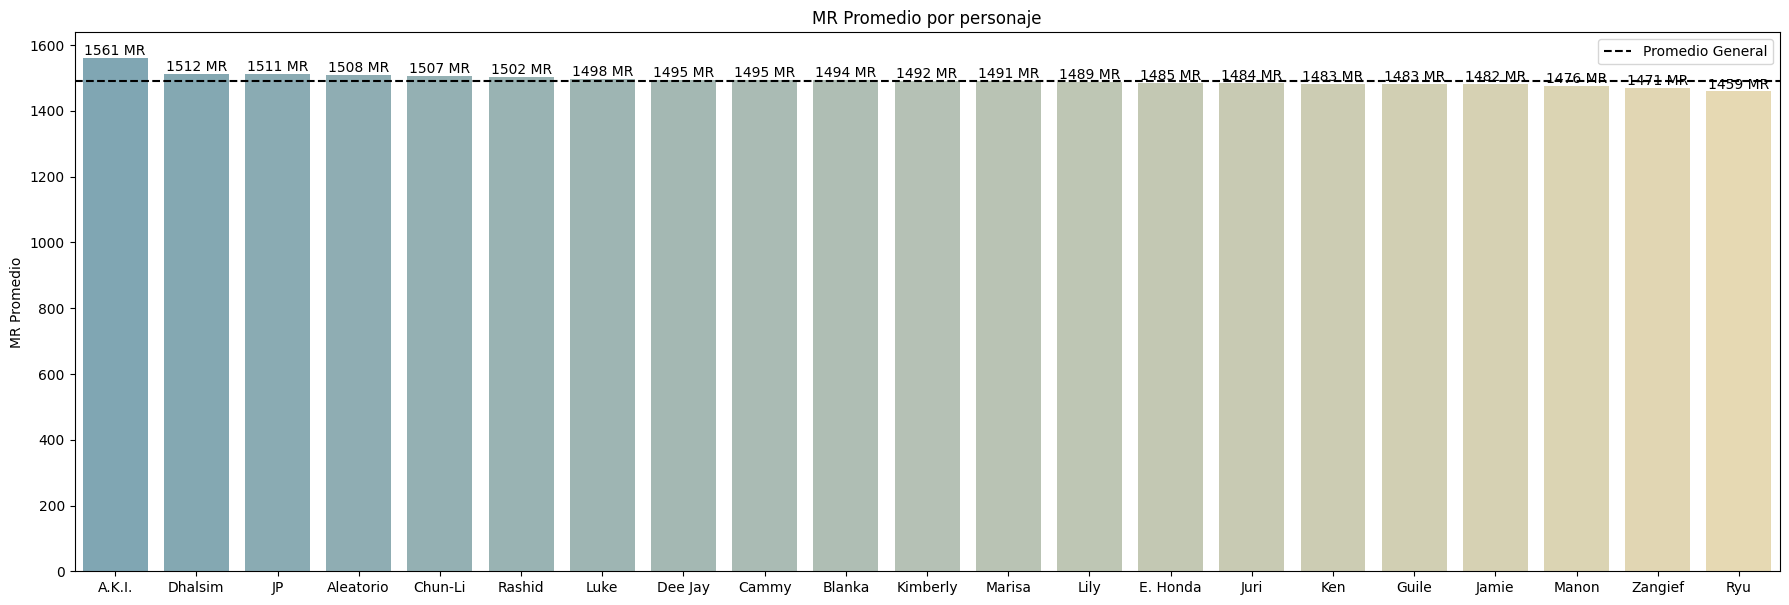

In [125]:
# Grafico

# Plot y config
plt.figure(figsize=(22, 7))
sns.barplot(data = avg_mr_pj_final.sort_values(by='mr',ascending=False),x='personaje',y='mr',palette="blend:#7AB,#EDA")
plt.title("MR Promedio por personaje")
ax = plt.gca()
ax.set_xlabel("")
ax.set_ylabel('MR Promedio')

# Agregando data marks
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} MR', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
# Agregando el promedio
mr_avg = df['mr'].mean()
plt.axhline(y = mr_avg,color='black',linestyle='--',label='Promedio General')
plt.legend()

# Show
plt.show()

In [121]:
# Uso de personajes por pais

conteo_personajes = df.groupby(['pais','personaje']).size().reset_index(name='cantidad')
conteo_personajes

# Este plot lo hice en Tableau, no me dio la cabeza

,pais,personaje,cantidad
0,Argentina,A.K.I.,6
1,Argentina,Aleatorio,1
2,Argentina,Blanka,9
3,Argentina,Cammy,30
4,Argentina,Chun-Li,11
...,...,...,...
187,Venezuela,Manon,1
188,Venezuela,Marisa,5
189,Venezuela,Rashid,1
190,Venezuela,Ryu,5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


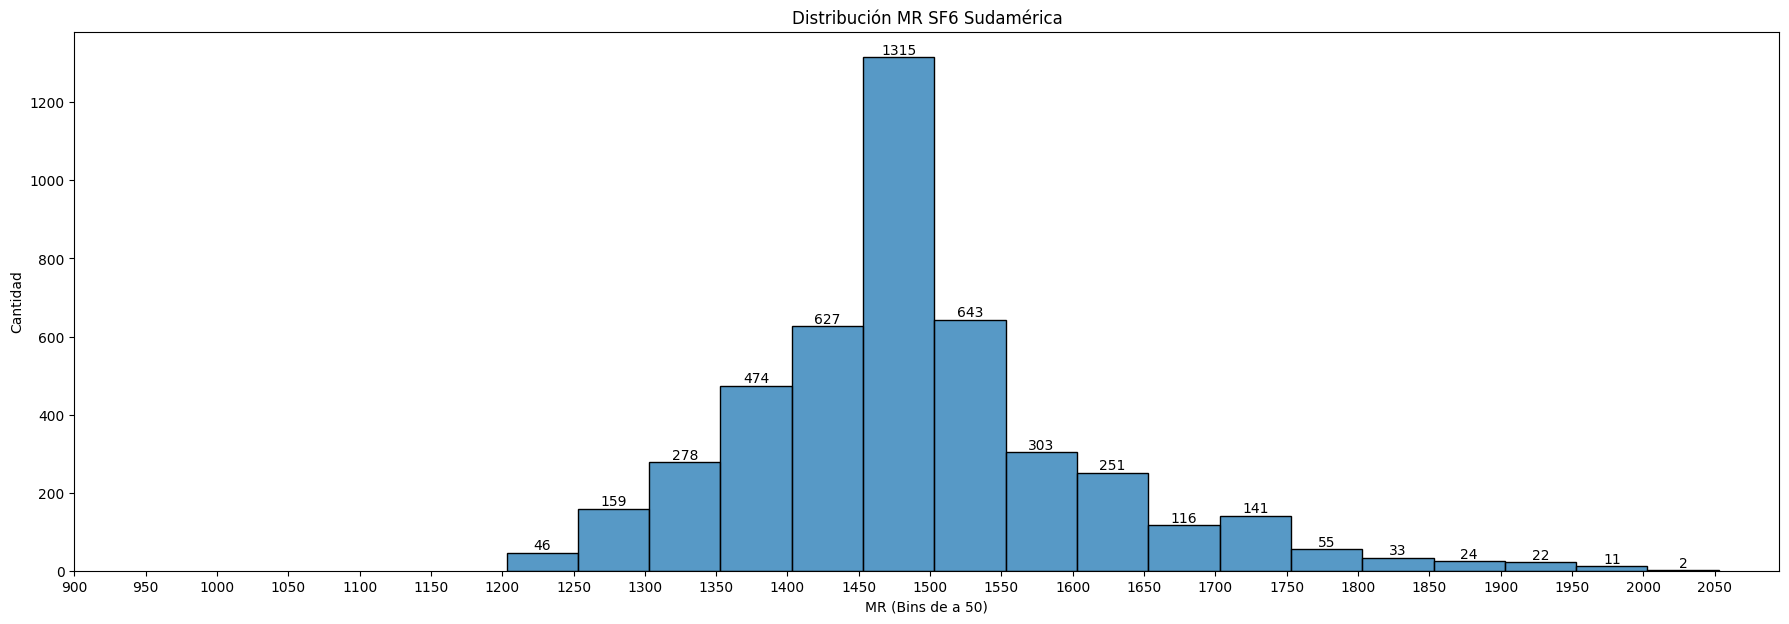

In [123]:
# Plot y config
plt.figure(figsize=(22, 7))
cols = ['grey' if (x < df['mr'].max()) else 'orange' for x in df['mr']]
histplot = sns.histplot(data=df['mr'],binwidth=50)
ax = plt.gca()

# Seteando ticks y labels
ticks = range(900,2100,50)
ax.set_xticks(ticks)
plt.title("Distribución MR SF6 Sudamérica")
plt.ylabel('Cantidad')
plt.xlabel("MR (Bins de a 50)")


# Configurando leyenda
histplot.legend().set_visible(False)


# Agregando data marks
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Show
plt.show()

